In [1]:
!pip install torchtext==0.6.0
!pip install spacy==2.2.3
!python -m spacy download en

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 1.3 MB 72.0 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.1
    Uninstalling torchtext-0.13.1:
      Successfully uninstalled torchtext-0.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 18.2 MB/s 
     |████████████████████████████████| 208 kB 67.5 MB/s 
     |████████████████████████████████| 2.2 MB 63.6 MB/s 
     |████████████████████████████████| 3.7 MB 56.6 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.8
    Uninstalling blis-0.7.8:
      Successfully uninstalled blis-0.

In [2]:
import torch
import torch.nn as nn
import torchtext.data as ttd
from torchtext.vocab import GloVe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2022-10-18 22:39:27--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.21MB/s    in 0.4s    

2022-10-18 22:39:28 (1.21 MB/s) - ‘spam.csv’ saved [503663/503663]



In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# rename columns to something better
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})

In [8]:
df2 = df[['data', 'b_labels']]
df2.head()

,data,b_labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
df2.to_csv('spam2.csv', index=False)

In [10]:
TEXT = ttd.Field(
    sequential=True,
    batch_first=True,
    lower=True,
    tokenize='spacy',
    pad_first=True)

LABEL = ttd.Field(sequential=False, use_vocab=False, is_target=True)

dataset = ttd.TabularDataset(
    path='spam2.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT), ('label', LABEL)])

In [11]:
train_dataset, test_dataset = dataset.split() # default is 0.7

In [12]:
TEXT.build_vocab(train_dataset)

In [13]:
vocab = TEXT.vocab

In [14]:
vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7f43fb823590>>,
            {'<unk>': 0,
             '<pad>': 1,
             '.': 2,
             'i': 3,
             'you': 4,
             'to': 5,
             ',': 6,
             '?': 7,
             'a': 8,
             'the': 9,
             '!': 10,
             '...': 11,
             'u': 12,
             'and': 13,
             'is': 14,
             'in': 15,
             'me': 16,
             'my': 17,
             'it': 18,
             'do': 19,
             'for': 20,
             '..': 21,
             'your': 22,
             'that': 23,
             'of': 24,
             'have': 25,
             'call': 26,
             'on': 27,
             '&': 28,
             'are': 29,
             ' ': 30,
             'now': 31,
             '2': 32,
             'not': 33,
             "'s": 34,
             'so': 35,
             'but': 36,
             ';': 37,
             'or': 

In [15]:
vocab.itos

['<unk>',
 '<pad>',
 '.',
 'i',
 'you',
 'to',
 ',',
 '?',
 'a',
 'the',
 '!',
 '...',
 'u',
 'and',
 'is',
 'in',
 'me',
 'my',
 'it',
 'do',
 'for',
 '..',
 'your',
 'that',
 'of',
 'have',
 'call',
 'on',
 '&',
 'are',
 ' ',
 'now',
 '2',
 'not',
 "'s",
 'so',
 'but',
 ';',
 'or',
 'we',
 'at',
 'be',
 'can',
 "'m",
 'ur',
 'will',
 ':',
 'get',
 'with',
 'just',
 'if',
 "n't",
 'no',
 'this',
 'how',
 'nt',
 'up',
 'from',
 'when',
 'lt;#&gt',
 '4',
 'ok',
 'all',
 'what',
 '*',
 '"',
 'free',
 'out',
 'go',
 ')',
 'know',
 '-',
 'was',
 '/',
 'got',
 'like',
 'time',
 'then',
 'come',
 'he',
 'am',
 'only',
 'good',
 "'ll",
 'its',
 'there',
 'want',
 'day',
 'love',
 'text',
 'as',
 'about',
 'send',
 'did',
 'one',
 'by',
 'she',
 'lor',
 'sorry',
 'home',
 'going',
 'need',
 'still',
 'today',
 'r',
 'txt',
 'back',
 'see',
 'stop',
 'd',
 'our',
 'reply',
 '_',
 'think',
 'n',
 'please',
 'pls',
 'her',
 'take',
 'mobile',
 'they',
 'da',
 'any',
 'tell',
 'here',
 'week',
 'l

In [16]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [17]:
train_iter, test_iter = ttd.Iterator.splits(
    (train_dataset, test_dataset), sort_key=lambda x: len(x.data),
    batch_sizes=(32, 256), device=device)

In [18]:
for inputs, targets in train_iter:
    print("inputs: ", inputs, "shape:", inputs.shape)
    print("targets:", targets, "shape:", targets.shape)
    break

inputs:  tensor([[   1,    1,    1,  ..., 7184, 6396,  679],
        [   1,    1,    1,  ...,   23,   61,    7],
        [   1,    1,    1,  ...,   26,  356,    2],
        ...,
        [   1,    1,    1,  ...,    4,   31,   10],
        [   1,    1,    1,  ..., 1693, 7310, 1387],
        [   1,    1,    1,  ..., 3267,   18,    2]]) shape: torch.Size([32, 95])
targets: tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0]) shape: torch.Size([32])


In [19]:
for inputs, targets in test_iter:
    print("inputs: ", inputs)
    print("targets:", targets)
    break

inputs:  tensor([[3145,    5,   41,  ...,  199,  151,   11],
        [ 174,    3,   19,  ...,  107,  202,   33],
        [  98,  509,    3,  ...,    5,  660,    2],
        ...,
        [   1,    1,    1,  ...,    1,    1,    0],
        [   1,    1,    1,  ...,    1,    1,  292],
        [   1,    1,    1,  ...,    1,    1,    0]])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0,

In [20]:
# define the model
class RNN(nn.Module):
    def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
        super(RNN, self).__init__()
        self.V = n_vocab
        self.D = embed_dim
        self.M = n_hidden
        self.K = n_outputs
        self.L = n_rnnlayers

        self.embed = nn.Embedding(self.V, self.D)
        self.rnn = nn.LSTM(
            input_size=self.D,
            hidden_size=self.M,
            num_layers=self.L,
            batch_first=True)
        self.fc = nn.Linear(self.M, self.K)

    def forward(self, X):
        h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
        c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

        out = self.embed(X)

        out, _ = self.rnn(out, (h0, c0))

        out, _ = torch.max(out, 1)

        out = self.fc(out)
        return out

In [21]:
model = RNN(len(vocab), 20, 15, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(7774, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [22]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [23]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_iter, test_iter, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        t0 = datetime.now()
        train_loss = []

        for inputs, targets in train_iter:
            targets = targets.view(-1, 1).float()

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())

        train_loss = np.mean(train_loss)

        test_loss = []
        for inputs, targets in test_iter:
            targets = targets.view(-1, 1).float()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0
        print(f"Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}")

    return train_losses, test_losses

In [24]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_iter, test_iter, 20)

Epoch 1/20, Train Loss: 0.4546, Test Loss: 0.4542, Duration: 0:00:03.325033
Epoch 2/20, Train Loss: 0.3753, Test Loss: 0.4484, Duration: 0:00:03.296486
Epoch 3/20, Train Loss: 0.3408, Test Loss: 0.4400, Duration: 0:00:03.292483
Epoch 4/20, Train Loss: 0.2985, Test Loss: 0.4026, Duration: 0:00:03.403903
Epoch 5/20, Train Loss: 0.2340, Test Loss: 0.3239, Duration: 0:00:01.578536
Epoch 6/20, Train Loss: 0.1732, Test Loss: 0.2577, Duration: 0:00:01.527938
Epoch 7/20, Train Loss: 0.1271, Test Loss: 0.2368, Duration: 0:00:01.572506
Epoch 8/20, Train Loss: 0.1015, Test Loss: 0.1945, Duration: 0:00:01.641697
Epoch 9/20, Train Loss: 0.0821, Test Loss: 0.1830, Duration: 0:00:01.574250
Epoch 10/20, Train Loss: 0.0668, Test Loss: 0.1691, Duration: 0:00:01.600112
Epoch 11/20, Train Loss: 0.0585, Test Loss: 0.1704, Duration: 0:00:01.547533
Epoch 12/20, Train Loss: 0.0489, Test Loss: 0.1522, Duration: 0:00:01.496880
Epoch 13/20, Train Loss: 0.0411, Test Loss: 0.1390, Duration: 0:00:01.563060
Epoch 14

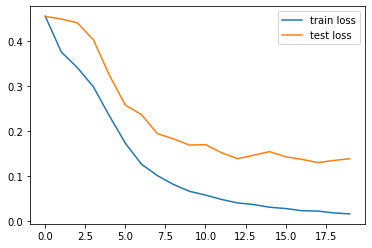

In [25]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [26]:
# Accuracy
p_train = []
y_train = []
for inputs, targets in train_iter:
    targets = targets.view(-1, 1).float()
    outputs = model(inputs)
    predictions = list((outputs > 0).cpu().numpy())
    p_train += predictions
    y_train += list(targets.cpu().numpy())

p_train = np.array(p_train)
y_train = np.array(y_train)
train_acc = np.mean(y_train == p_train)

p_test = []
y_test = []
for inputs, targets in test_iter:
    targets = targets.view(-1, 1).float()
    outputs = model(inputs)
    predictions = list((outputs > 0).cpu().numpy())
    p_test += predictions
    y_test += list(targets.cpu().numpy())

p_test = np.array(p_test)
y_test = np.array(y_test)
test_acc = np.mean(y_test == p_test)

print(f"Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}")

Train accuracy: 0.9977, Test accuracy: 0.9539


In [27]:
df[df['labels'] == 'spam'].size / df.size

0.13406317300789664

In [28]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1378   55]
 [  22  217]]


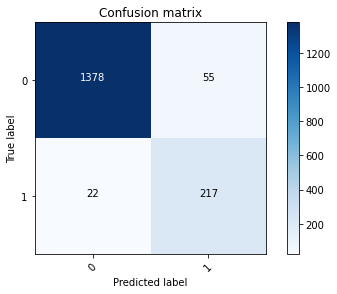

In [29]:
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, [0,1])

Confusion matrix, without normalization
[[3392    0]
 [   9  499]]


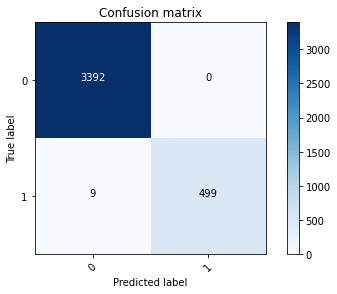

In [30]:
cm = confusion_matrix(y_train, p_train)
plot_confusion_matrix(cm, [0,1])

In [31]:
# Make perdictions
# Get random test data
df[df.labels == 'spam'].sample(3)

,labels,data,b_labels
4541,spam,FreeMsg Hi baby wow just got a new cam moby. W...,1
812,spam,Congratulations ur awarded either å£500 of CD ...,1
4839,spam,PRIVATE! Your 2003 Account Statement for shows...,1


In [32]:
small_sample = df[df.labels == 'spam'].sample(3)
with open('sample_test.csv', 'w') as f:
    f.write("data\n") # header
    for i, row in small_sample.iterrows():
        f.write(row['data'] + "\n")

In [33]:
!cat sample_test.csv

data
Bloomberg -Message center +447797706009 Why wait? Apply for your future http://careers. bloomberg.com
As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a å£1500 Bonus Prize, call 09066364589
1000's of girls many local 2 u who r virgins 2 this & r ready 2 4fil ur every sexual need. Can u 4fil theirs? text CUTE to 69911(å£1.50p. m)


In [34]:
sample_dataset = ttd.TabularDataset(
    path='sample_test.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT)])

In [35]:
sample_iter = ttd.Iterator(
    sample_dataset,
    batch_size=32,
    sort_key=lambda x: len(x.data),
    device=device)

In [37]:
for inputs in sample_iter:
    print("inputs:", inputs)
    outputs = model(inputs.data)
    print(outputs)

inputs: 
[torchtext.data.batch.Batch of size 3]
	[.data]:[torch.LongTensor of size 3x35]
tensor([[ 3.9982],
        [-0.9372],
        [ 3.3757]], grad_fn=<AddmmBackward0>)


In [40]:
single_sentence = "Bloomberg -Message center +447797706009 Why wait? Apply for your future http://careers. bloomberg.com As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a å£1500 Bonus Prize, call 09066364589 1000's of girls many local 2 u who r virgins 2 this & r ready 2 4fil ur every sexual need. Can u 4fil theirs? text CUTE to 69911(å£1.50p. m)"
TEXT.preprocess(single_sentence)

['bloomberg',
 '-message',
 'center',
 '+447797706009',
 'why',
 'wait',
 '?',
 'apply',
 'for',
 'your',
 'future',
 'http://careers',
 '.',
 'bloomberg.com',
 'as',
 'a',
 'valued',
 'customer',
 ',',
 'i',
 'am',
 'pleased',
 'to',
 'advise',
 'you',
 'that',
 'following',
 'recent',
 'review',
 'of',
 'your',
 'mob',
 'no',
 '.',
 'you',
 'are',
 'awarded',
 'with',
 'a',
 'å£1500',
 'bonus',
 'prize',
 ',',
 'call',
 '09066364589',
 '1000',
 "'s",
 'of',
 'girls',
 'many',
 'local',
 '2',
 'u',
 'who',
 'r',
 'virgins',
 '2',
 'this',
 '&',
 'r',
 'ready',
 '2',
 '4fil',
 'ur',
 'every',
 'sexual',
 'need',
 '.',
 'can',
 'u',
 '4fil',
 'theirs',
 '?',
 'text',
 'cute',
 'to',
 '69911(å£1.50p',
 '.',
 'm',
 ')']

In [41]:
TEXT.numericalize([TEXT.preprocess(single_sentence)])

tensor([[2539, 2304, 1540, 2302,  202,  221,    7,  436,   20,   22, 1138, 2860,
            2, 2540,   90,    8, 1071,  269,    6,    3,   80, 2130,    5, 4080,
            4,   23, 1984, 6609, 1705,   24,   22,  514,   52,    2,    4,   29,
          363,   48,    8, 7752,  822,  183,    6,   26,    0, 1466,   34,   24,
          648,  254, 1642,   32,   12,  139,  104, 7476,   32,   53,   28,  104,
          344,   32, 2389,   44,  199, 6819,  101,    2,   42,   12, 2389, 7220,
            7,   89, 1556,    5, 3894,    2,  205,   69]])

In [42]:
toks = TEXT.preprocess(single_sentence)
sent_idx = TEXT.numericalize([toks])
model(sent_idx.to(device))

tensor([[3.5840]], grad_fn=<AddmmBackward0>)